# **Histograms**

* A histogram is a visual representation of the distribution of a continuous feature.
* For images, we can display the frequency of values for colours
Each of the 3 RGB channels have values between 0-255.
* We can plot these three histograms on top of each other to see how much of each channel there is.
* Peaks of histograms can be joined together to form a curve.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
horse_bgr=cv2.imread('../DATA/horse.jpg') #Original BGR OpenCV
horse=cv2.cvtColor(horse_bgr, cv2.COLOR_BGR2RGB) #Converted to RGB for showing on matplotlib

rainbow_bgr=cv2.imread('../DATA/rainbow.jpg')
rainbow=cv2.cvtColor(rainbow_bgr, cv2.COLOR_BGR2RGB)

bricks_bgr=cv2.imread('../DATA/bricks.jpg')
bricks=cv2.cvtColor(bricks_bgr, cv2.COLOR_BGR2RGB)

#the bgr images will be used to perform calculations

In [8]:
def display_img(img):
    fig=plt.figure(figsize=(12,10))
    ax=fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

Here's a visual representation of difference between RGB and BGR channels:

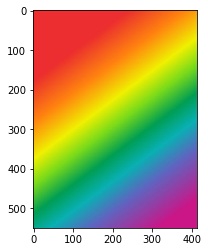

In [12]:
plt.imshow(rainbow)

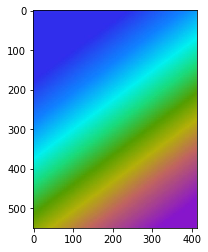

In [10]:
plt.imshow(rainbow_bgr)

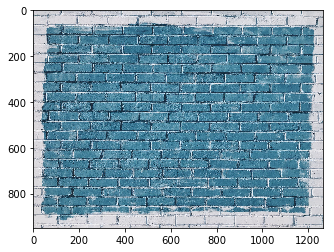

In [13]:
plt.imshow(bricks)

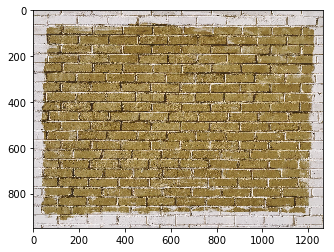

In [14]:
plt.imshow(bricks_bgr)

Calculating Histogram Values:

In [16]:
#OPENCV channel order: 0-->Blue, 1-->Green, 2-->Red
hist_values=cv2.calcHist([bricks_bgr], channels=[0], mask=None, histSize=[256], ranges=[0,256]) 
#calcHist() takes image as a parameter in list form
hist_values.shape

(256, 1)

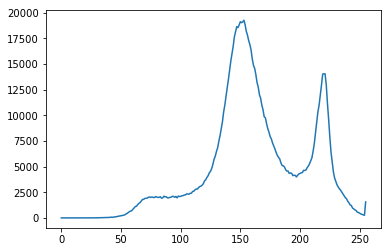

In [17]:
plt.plot(hist_values)

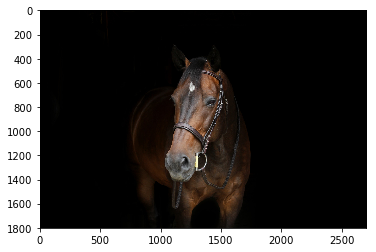

In [22]:
plt.imshow(horse)

In [20]:
#checking for horse image:
horse_hist_values=cv2.calcHist([horse_bgr], channels=[0], mask=None, histSize=[256], ranges=[0,256]) 
#calcHist() takes image as a parameter in list form
horse_hist_values.shape

(256, 1)

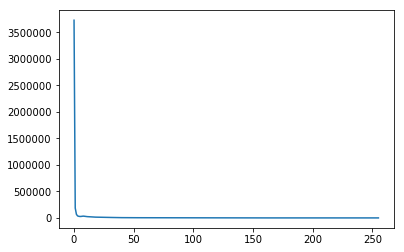

In [21]:
plt.plot(horse_hist_values)

Text(0.5,1,'HISTOGRAM FOR BRICKS IMAGE')

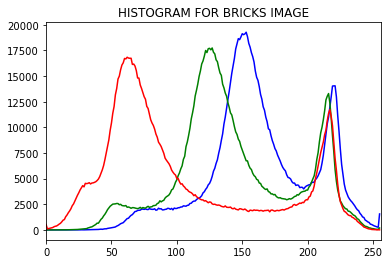

In [25]:
img=bricks_bgr
color=('b','g','r')

for i, col in enumerate(color):
    hist=cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(hist,color=col)
    plt.xlim([0,256])

plt.title('HISTOGRAM FOR BRICKS IMAGE')

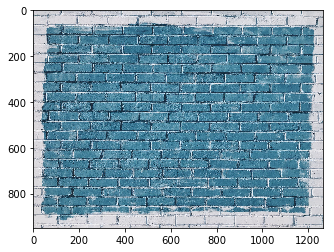

In [26]:
plt.imshow(bricks)

It is evident that contribution of Blue is much higher in this image so the histogram is pretty much accurate.
Let's now do this for the horse image.

Text(0.5,1,'HISTOGRAM FOR HORSE')

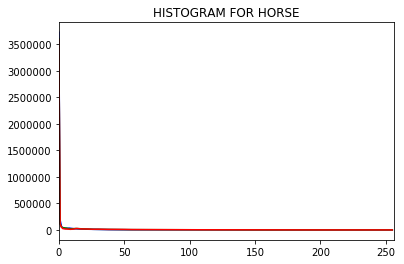

In [27]:
im=horse_bgr
color=('b','g','r')

for i, col in enumerate(color):
    hist=cv2.calcHist([im],[i],None,[256],[0,256])
    plt.plot(hist,color=col)
    plt.xlim([0,256])

plt.title('HISTOGRAM FOR HORSE')

Very little contribrution of all colours. 

# Histograms on a masked portion of the image:

It is possible to select an ROI and only calculate the color histogram of that masked section.

In [37]:
img=rainbow_bgr
img.shape

(550, 413, 3)

In [38]:
img.shape[:2] #grabbing x and y components

(550, 413)

In [39]:
mask=np.zeros(img.shape[:2], np.uint8)

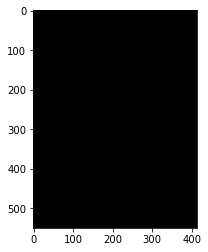

In [40]:
plt.imshow(mask,cmap='gray')

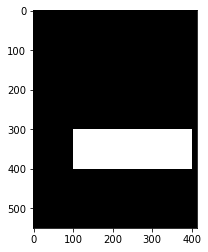

In [41]:
mask[300:400,100:400]=255 #making a white rectangle
plt.imshow(mask,cmap='gray')

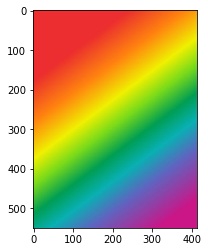

In [42]:
plt.imshow(rainbow)

In [43]:
masked_img=cv2.bitwise_and(img,img,mask=mask)

In [44]:
show_mask_img=cv2.bitwise_and(rainbow,rainbow,mask=mask)

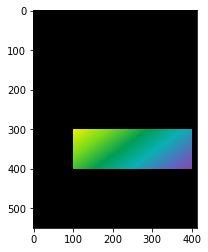

In [45]:
plt.imshow(show_mask_img)

In [53]:
hist_mask_values_red=cv2.calcHist([rainbow_bgr],channels=[2],mask=mask,histSize=[256], ranges=[0,256])

In [54]:
hist_values_red=cv2.calcHist([rainbow_bgr],channels=[2],mask=None,histSize=[256], ranges=[0,256])

Text(0.5,1,'Red Histogram for masked Rainbow')

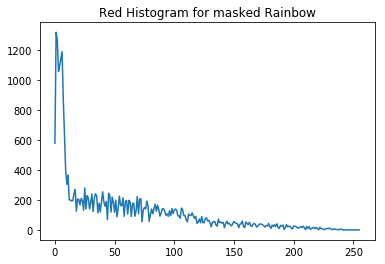

In [55]:
plt.plot(hist_mask_values_red)
plt.title('Red Histogram for masked Rainbow')

Text(0.5,1,'Red Histogram for full Rainbow image')

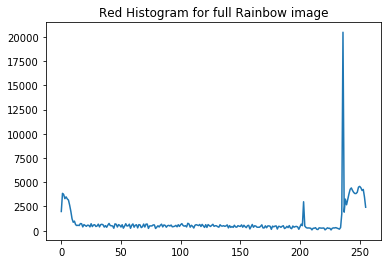

In [57]:
plt.plot(hist_values_red)
plt.title('Red Histogram for full Rainbow image')